In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

import os
import cv2
from PIL import Image #use to resize the image
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [24]:
image_directory = 'cell_images/'

SIZE = 150

dataset = []
label = []

In [25]:
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate( parasitized_images):
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)
        
#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)
        

dataset = np.array(dataset)
label = np.array(label)

In [26]:
print(dataset.shape)
print(label.shape)

(27558, 150, 150, 3)
(27558,)


Label for this image is: 0


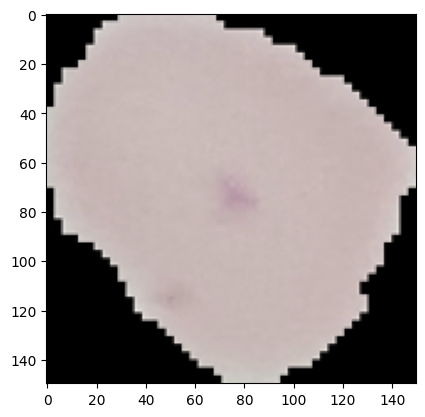

In [27]:
import random

image_number = random.randint(0, len(dataset) - 1)
plt.imshow(np.reshape(dataset[image_number], (150, 150, 3)))
print(f"Label for this image is: {label[image_number]}")

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [29]:
print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))


Number of training samples: 22046
Number of testing samples: 5512


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
print(y_train)
print(y_test)

[0 1 1 ... 1 1 1]
[1 1 0 ... 0 1 0]


In [31]:
INPUT_SHAPE = (SIZE, SIZE, 3)   

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) 

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
#Do not use softmax for binary classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins.

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#But, also good for binary mutually exclusive (cat or not cat).

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                        

In [34]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train,
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 30,
                         validation_data=(X_test,y_test),
                         shuffle = False)
#                          callbacks = [early_stop]
#                  

Epoch 1/30
345/345 [==============================] - 292s 845ms/step - loss: 14.7069 - accuracy: 0.5381 - val_loss: 0.6703 - val_accuracy: 0.5916
Epoch 2/30
345/345 [==============================] - 290s 841ms/step - loss: 0.6754 - accuracy: 0.5786 - val_loss: 0.6693 - val_accuracy: 0.6118
Epoch 3/30
345/345 [==============================] - 297s 862ms/step - loss: 0.6740 - accuracy: 0.5782 - val_loss: 0.6673 - val_accuracy: 0.6134
Epoch 4/30
345/345 [==============================] - 297s 861ms/step - loss: 0.6463 - accuracy: 0.6241 - val_loss: 0.5116 - val_accuracy: 0.8189
Epoch 5/30
345/345 [==============================] - 300s 870ms/step - loss: 0.4523 - accuracy: 0.8218 - val_loss: 0.2866 - val_accuracy: 0.9146
Epoch 6/30
345/345 [==============================] - 301s 872ms/step - loss: 0.2850 - accuracy: 0.9069 - val_loss: 0.2709 - val_accuracy: 0.9347
Epoch 7/30
345/345 [==============================] - 319s 924ms/step - loss: 0.2309 - accuracy: 0.9212 - val_loss: 0.2614 

In [37]:
model.save("malaria-cnn-v1.keras")

In [18]:
model.evaluate()

517/517 [==============================] - 128s 247ms/step - loss: 524.0143 - accuracy: 0.2468


[524.0143432617188, 0.2467791736125946]